In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from copy import deepcopy as dc
!pip install pmdarima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.3 MB/s eta 0:00:00


In [ ]:
# Carga y procesamiento
sales = pd.read_csv("https://raw.githubusercontent.com/armando-lv/csv_storage/main/2022-2.csv", index_col = None)
sales.columns = [x.strip() for x in sales.columns]
sales = sales[["Propiedad", "Agente", "Venta", "Mes"]]

# Cambiar nombres de meses por número
month_dict = dict(zip(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], 
                      [x for x in range(1, 13)]))
sales["Mes"] = sales["Mes"].map(lambda x: month_dict[x])
sales = sales.sort_values(by = ["Mes"]).reset_index(drop = True)

        Venta
Mes          
1    32751000
2    53069350
3    25538000
4    51045000
5    22781000
6     2740000
7     7841000
9     6855000
10    2437000
11   40324000


<Axes: xlabel='Mes'>

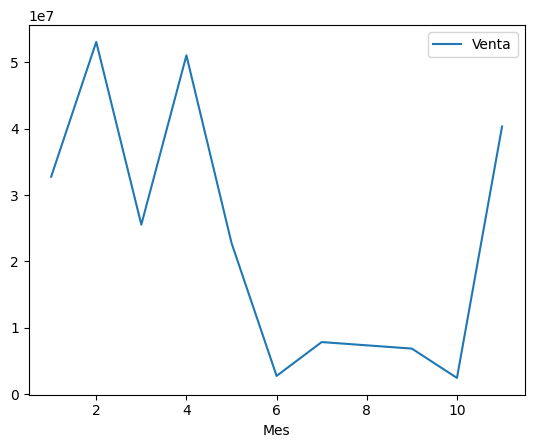

In [ ]:
sales_sum = sales[["Venta", "Mes"]].groupby(["Mes"]).sum()
print(sales_sum)
sns.lineplot(sales_sum)

     Venta
Mes       
1        8
2       18
3       10
4       16
5        6
6        2
7        2
9        2
10       4
11      12


<Axes: xlabel='Mes'>

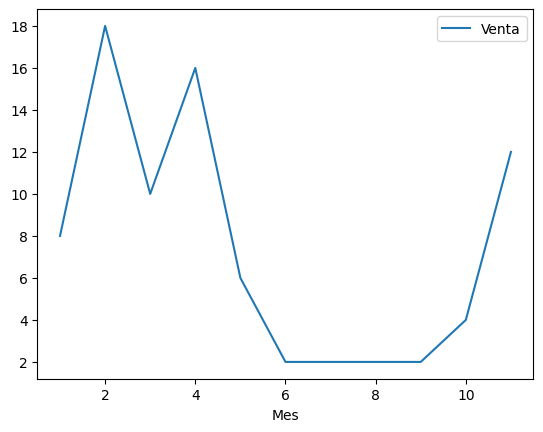

In [ ]:
sales_count = sales[["Venta", "Mes"]].groupby(["Mes"]).count()
print(sales_count)
sns.lineplot(sales_count)

<Axes: >

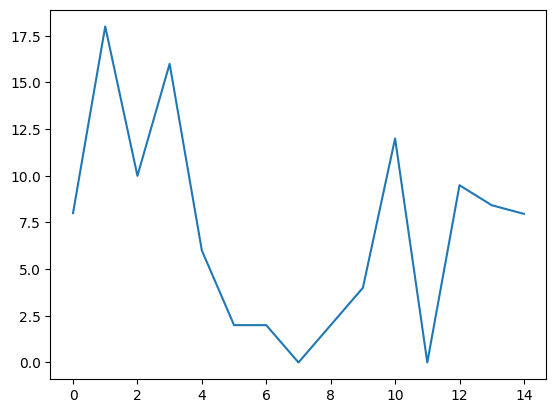

In [ ]:
# Modelo arima para pronosticar cantidad de ventas en enero, febrero y marzo 2022
count_series = [x[0] for x in sales_count.values]
count_series = count_series[:7] + [0] + count_series[7:]

for i in range(1, 4):
  model = auto_arima(count_series, start_p=0, start_q=0)
  result = model.predict(steps = 1)
  count_series.append(result[0])

count_series = count_series[:11] + [0] + count_series[11:]
sns.lineplot(count_series)

<Axes: >

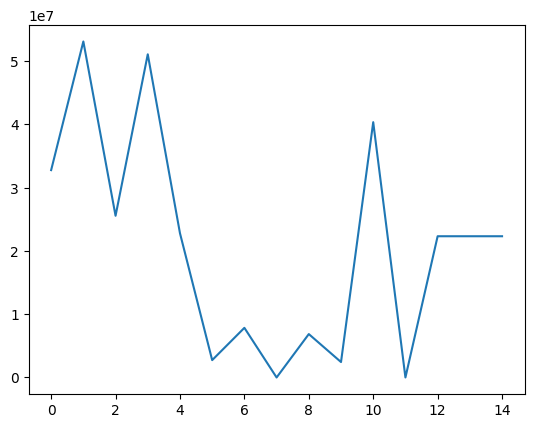

In [ ]:
# Modelo arima para pronosticar cantidad de ventas en enero, febrero y marzo 2022
sales_series = [x[0] for x in sales_sum.values]
sales_series = sales_series[:7] + [0] + sales_series[7:]

for i in range(1, 4):
  model = auto_arima(sales_series, start_p=0, start_q=0)
  result = model.predict(steps = 1)
  sales_series.append(result[0])

sales_series = sales_series[:11] + [0] + sales_series[11:]
sns.lineplot(sales_series)

El modelo de simulación desarrollado ha proporcionado una perspectiva y una herramienta para solucionar el problema que se tiene en el negocio que se presenta al momento de asignar las diversas propiedades a los diferentes agentes y que de forma directa e indirecta ha afectado de manera importante los ingresos en determinados meses. Por lo cual, se puede concluir a grandes rasgos que las variables implementadas en la simulación han fungido como una pieza clave para distinguir las más relevantes y las que nos permitieron llegar a crear un modelo de simulación que logró determinar cuál es la mejor estrategia para generar las asignaciones de venta de un terreno a un agente para maximizar las ventas.

De igual manera, es importante mencionar que han existido algunas complicaciones alrededor del modelo que en un principio preocupo al grupo y totalmente distorsionando los objetivos a los que teníamos establecimos, pero finalmente logramos interpretar de forma efectiva la dinámica idónea y la alteración de las múltiples variables que afectan a la asignación concreta de los agentes considerando las variables más importantes.